# Introduction to Matplotlib

## Matplotlib - What is it?

Matplotlib is a plotting library for Python that allows you to create graphs and charts based on data from dataframes in pandas and NumPy arrays for example.

!["Matplotlib Workflow"](../../assets/images/notes/018-matplotlib-workflow.png)

## Matplotlib - Anatomy of a Plot / Figure

!["Anatomy of a Matplotlib Plot / Figure"](../../assets/images/notes/019-matplotlib-plot-anatomy.png)

## Matplotlib - Creating Plots

### Import Required Libraries

In [1]:
# --- %matplotlib inline will ensure that the plots / figures show up in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Create A Plot / Figure (empty)

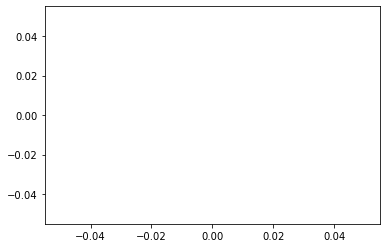

In [2]:
# --- This will create an empty plot, also called a figure) as no values 
# --- have been passed to plt against:
plt.plot()
plt.show()

### Create A Plot / Figure (Basic X & Y)

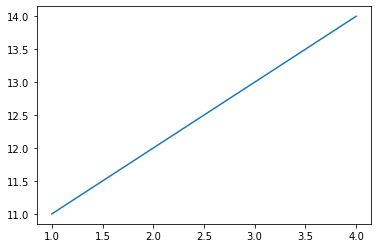

In [3]:
# --- Define two lists, one for each axis:
x_axis = [1, 2, 3, 4]
y_axis = [11, 12, 13, 14]

# --- Create a new figure with plot data from the two lists:
# --- Note: The default output is a line plot.
plt.plot(x_axis, y_axis)
plt.show()

Now, the above two plots were made using what is called the pyplot API. This method offers the least amount of flexibility in what you can do with it but it is quicker. It is also not recommended by the Matplotlib developers.

The second method is called the object-orientated API. This allows for a lot more flexibility and customisation of a plot. Lets take a look at that method.

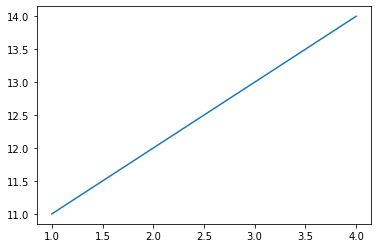

In [4]:
# --- There are other methods to this but this is recommended:

# --- Create a figure for the plot chart:
fig, ax = plt.subplots()

# --- Show the plot with the x and y axis data.
# --- The ; will remove the list object details that appear above the plot.
ax.plot(x_axis, y_axis);

Each time you run the plot, it will create it from scratch, rather than keep it buffered.

## Matplotlib - Example Workflow

The below is an example Matplotlib workflow from beginning to end.

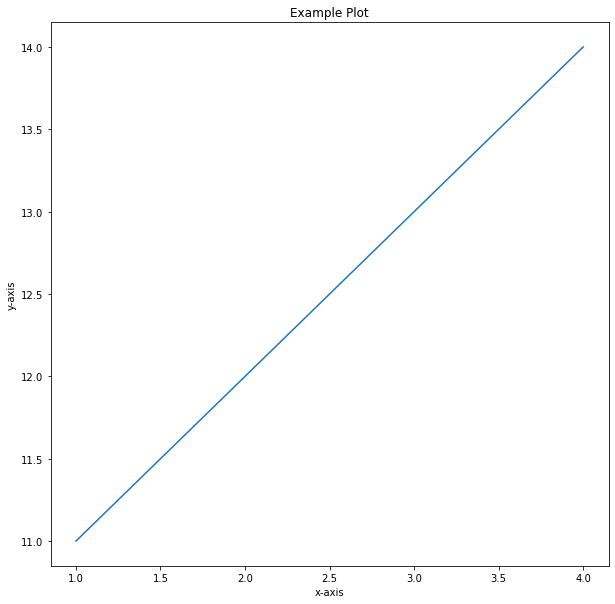

In [5]:
# --- Import the required libraries:
%matplotlib inline

import matplotlib.pyplot as plt

# --- Prepare the data to be used in the plot / figure:
x = [1, 2, 3, 4]
y = [11, 12, 13, 14]

# --- Setup the plot / figure:
# --- figsize is width and height.
fig, ax = plt.subplots(figsize = (10, 10))

# --- Customise the plot:
ax.set(title  = "Example Plot",
       xlabel = "x-axis",
       ylabel = "y-axis")

# --- Add the data to the plot so it can be plotted:
ax.plot(x, y)

# --- Save and show the figure
# --- Note: png file type doesn't seem to save anything but the line. JPEG & SVG works fine.
fig.savefig(fname  = "example-plot.jpg", 
            format = "jpg")

## Matplotlib - Figures from NumPy Arrays

In [6]:
# --- Create a NumPy array with 100 samples:
# --- linspace = Returns evenly spaced numbers over a specified interval.
# --- The below example will be between 0 and 10, generating 100 numbers.
x = np.linspace(start = 0,
                stop  = 10,
                num   = 100)

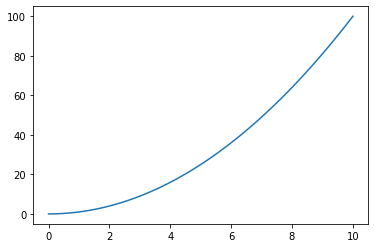

In [7]:
# --- Plot the above data as a line plot.
# --- Note, for a y axis we will square x:
fig, ax = plt.subplots()
ax.plot(x, x**2);

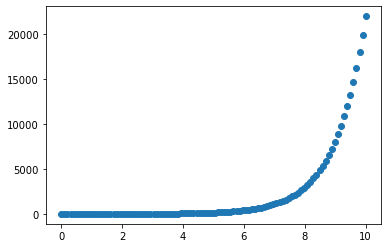

In [8]:
# --- From the same data, create a scatter plot:
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

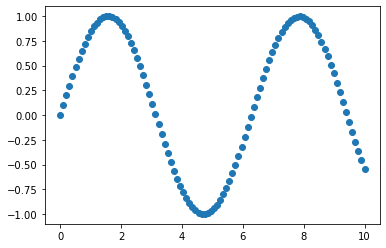

In [9]:
# --- From the same data, create a scatter plot:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

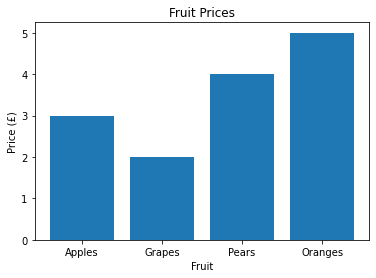

In [10]:
# --- Create a vertical bar plot from a Python dictionary:
item_prices = {"Apples": 3,
               "Grapes": 2,
               "Pears": 4,
               "Oranges": 5}

fig, ax = plt.subplots()
ax.set(title  = "Fruit Prices",
       xlabel = "Fruit",
       ylabel = "Price (£)")

# --- Convert the dictionary keys and values to lists to plot the bar plot:
ax.bar(x      = list(item_prices.keys()), 
       height = list(item_prices.values()));

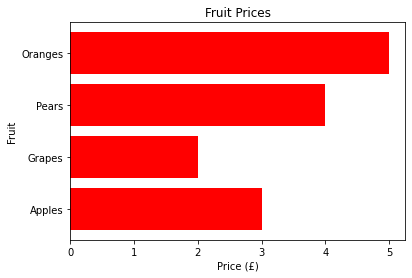

In [11]:
# --- Create a horizontal bar plot from a Python dictionary:
fig, ax = plt.subplots()
ax.set(title  = "Fruit Prices",
       xlabel = "Price (£)",
       ylabel = "Fruit")

# --- Convert the dictionary keys and values to lists to plot the bar plot:
ax.barh(y     = list(item_prices.keys()),
        width = list(item_prices.values()),
        color = "Red");

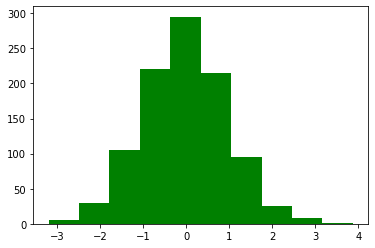

In [12]:
# --- Create a histogram plot:
x = np.random.randn(1000)

fig, ax = plt.subplots()

ax.hist(x     = x, 
        color = "Green");

### Matplotlib - Subplots

Subplots allow you to create multiple axes inside a single figure.

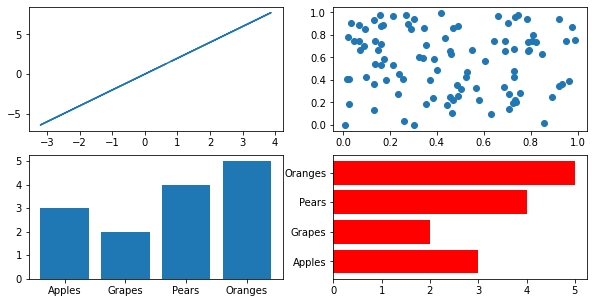

In [13]:
# --- Subplot option one:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows   = 2,
                                             ncols   = 2,
                                             figsize = (10,5))

# --- Axes plots will be left to right and then the next row:
ax1.plot(x, x*2)

ax2.scatter(x  = np.random.random(100), 
            y  = np.random.random(100))

ax3.bar(x      = list(item_prices.keys()), 
        height = list(item_prices.values()))

ax4.barh(y     = list(item_prices.keys()),
         width = list(item_prices.values()),
         color = "Red");

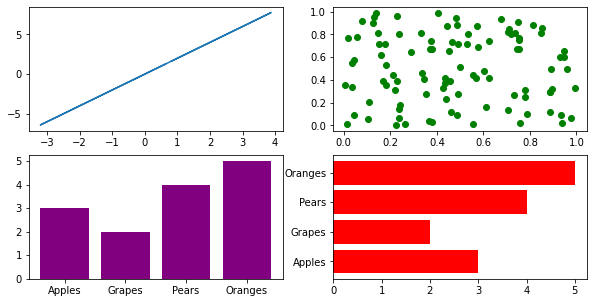

In [14]:
# --- Subplot option two:
# --- Creates a new figure and axes with two row and two columns
fig, ax = plt.subplots(nrows   = 2,
                       ncols   = 2,
                       figsize = (10,5))

# --- Axes plots will be left to right and then the next row.
# --- This time, instead of defining individual axes you use list indexes
# --- first the row and then the column:
ax[0, 0].plot(x, x*2)

ax[0, 1].scatter(x  = np.random.random(100), 
                 y  = np.random.random(100),
                 color = "Green")

ax[1, 0].bar(x      = list(item_prices.keys()), 
             height = list(item_prices.values()),
             color = "Purple")

ax[1, 1].barh(y     = list(item_prices.keys()),
              width = list(item_prices.values()),
              color = "Red");

## Matplotlib - Plotting From Pandas DataFrames

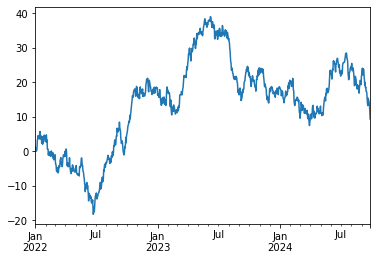

In [15]:
# --- An example of using time series data to create a plot:
ts = pd.Series(np.random.randn(1000),
               index = pd.date_range("1/1/2022",
               periods = 1000))
ts = ts.cumsum()
ts.plot();

In [16]:
# --- Create a variable with some car sales data:
car_sales = pd.read_csv("../../course-material/data/car-sales.csv")

In [17]:
# --- Remove the $, , and . from each value in the Price column and remove two zeros:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex = True).str[:-2]

# --- Convert the price column to numeric:
car_sales["Price"] = pd.to_numeric(car_sales["Price"])

In [18]:
# --- Add a sales date column:
car_sales["Sale Date"] = pd.date_range("1/1/2022", periods=len(car_sales))

In [19]:
# --- Create a column with the cumulative sales overall:
car_sales["Total Sales"] = car_sales["Price"].cumsum()

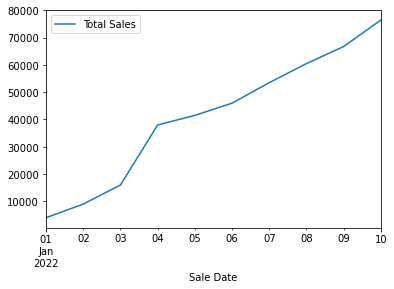

In [20]:
# --- Plot the total sales over time:
car_sales.plot(x = "Sale Date",
               y = "Total Sales", 
               kind = "line");

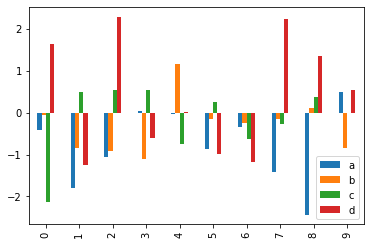

In [34]:
# --- Plot some random data as a bar chart:
np.random.seed(2)
sample_array_1 = np.random.randn(10, 4)
df = pd.DataFrame(sample_array_1, columns=["a", "b", "c", "d"])

df.plot(kind = "bar");

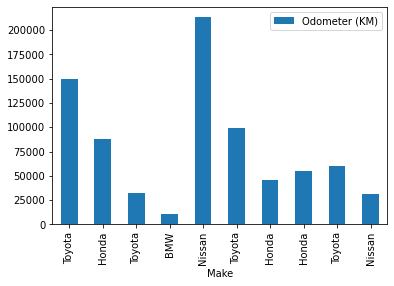

In [36]:
# --- Plot the odometer reading by make:
car_sales.plot(x = "Make",
               y = "Odometer (KM)", 
               kind = "bar");

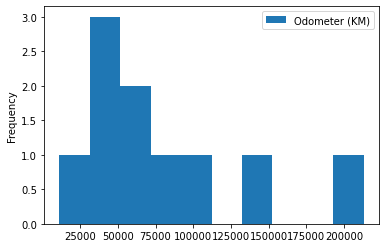

In [40]:
# --- Plot the odometer reading as an histogram:
car_sales.plot(y = "Odometer (KM)",
               bins = 10,
               kind = "hist");

In [42]:
heart_disease = pd.read_csv("../../course-material/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


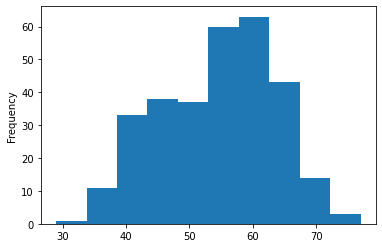

In [52]:
# --- bins is used to determine the grouping sizing and width. Change this as needed. Default is 10:
heart_disease["age"].plot(kind = "hist",
                          bins = 10);

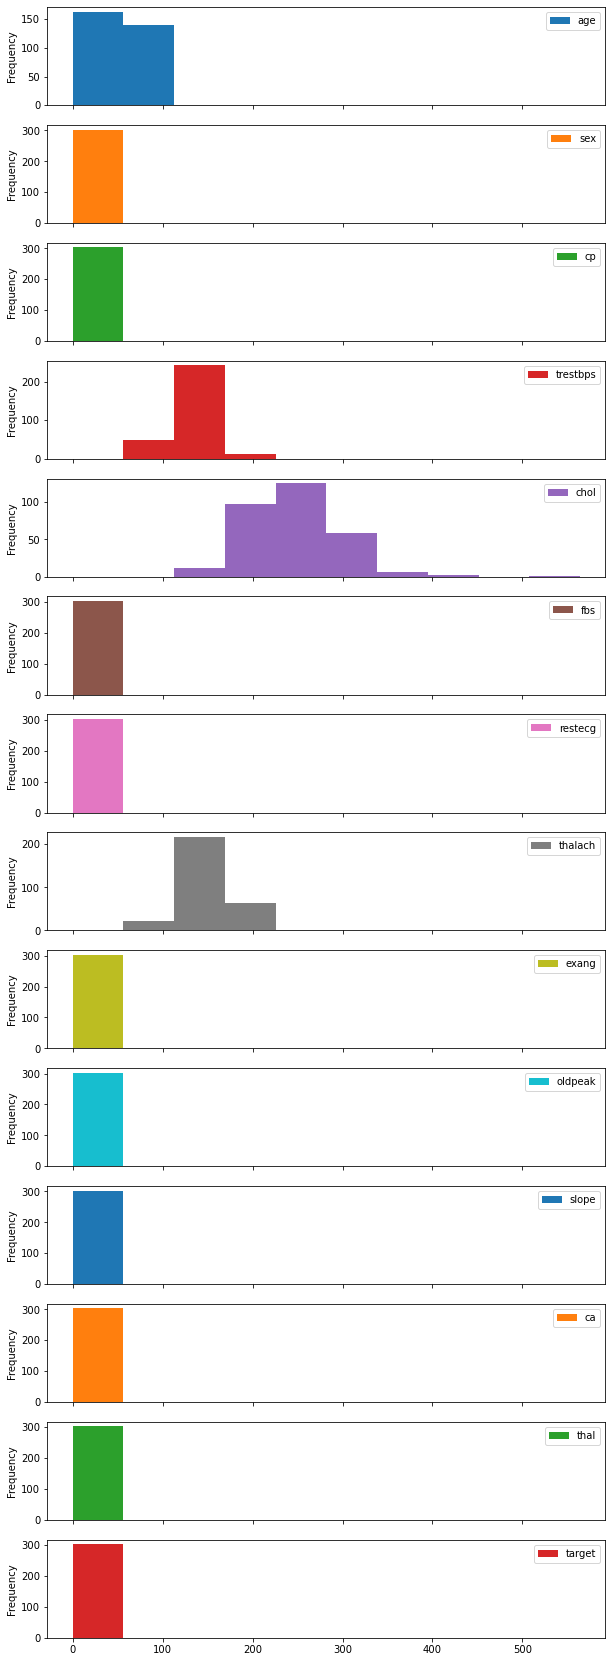

In [53]:
# --- Create a subplotted figure of every datapoint (subplots = True) in the DF:
# --- For this dataset it is not ideal as the output is mostly meaningless:
heart_disease.plot.hist(figsize = (10, 30),
                        subplots=True);

### Pyplot vs. Object Oriented Methods

* For quick and simple plotting, use pyplot.
* For everything else, use the object oriented method.

In [63]:
# --- Create a subset of the HD DF for people over 50:
over_fifty = heart_disease[heart_disease["age"] > 50]
print(f"Over Fifty Type: {type(over_fifty)}\n")
print(f"Total Over Fifty Records: {len(over_fifty)}")

over_fifty.head()

Over Fifty Type: <class 'pandas.core.frame.DataFrame'>

Total Over Fifty Records: 208


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


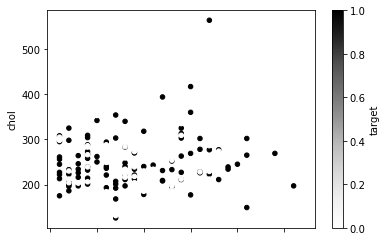

In [61]:
# --- Pyplot method.
# --- Create a scatter plot from the over fifty DF.
# --- Note: target = do they have heart disease (1) or not (0):
over_fifty.plot(kind = "scatter",
                x = "age",
                y = "chol",
                c = "target");

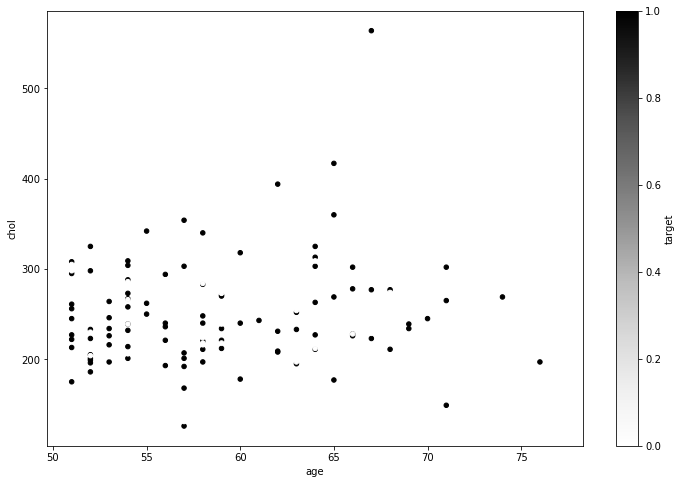

In [67]:
# --- Partial Object Oriented method (combined with pyplot method):
fig, ax = plt.subplots(figsize = (12,8))
over_fifty.plot(kind = "scatter",
                x = "age",
                y = "chol",
                c = "target",
                ax = ax);

# --- Optional: Set the x axis to start at 45 and end at 100:
# ax.set_xlim([45, 100])


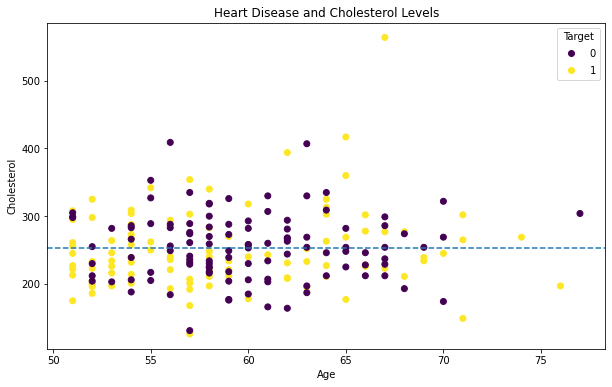

In [101]:
# --- Full object oriented method:
fig, ax = plt.subplots(figsize = (10, 6))

# --- Customise the scatter plot:
ax.set(title  = "Heart Disease and Cholesterol Levels",
       xlabel = "Age",
       ylabel = "Cholesterol")

# --- Create a scatter plot:
scatter = ax.scatter(x = over_fifty["age"],
                     y = over_fifty["chol"],
                     c = over_fifty["target"],
                     )

# --- Add a legend:
ax.legend(*scatter.legend_elements(),
          title = "Target")

# --- Add a horizontal line:
ax.axhline(over_fifty["chol"].mean(),
           linestyle = "--")


AttributeError: 'Text' object has no property 'fontcolor'

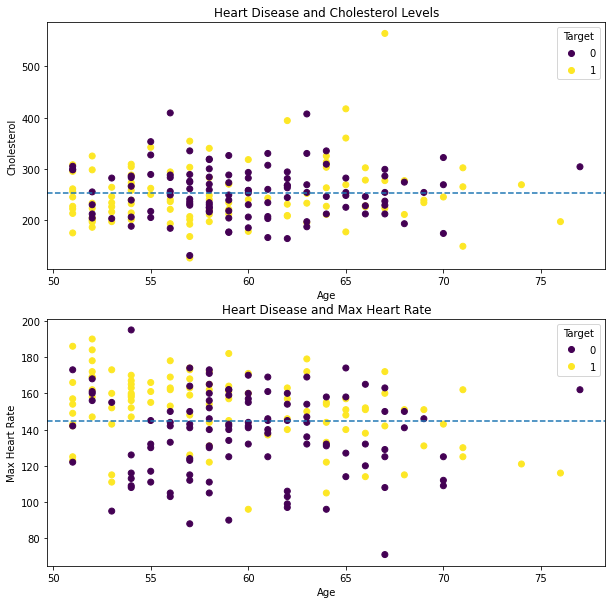

In [110]:
# --- Full object oriented method.
# --- Create two subplots in one figure:

fig, (ax0, ax1) = plt.subplots(nrows = 2,
                               ncols = 1,
                               figsize = (10, 10))

# --- Customise the scatter plot for ax0:
ax0.set(title  = "Heart Disease and Cholesterol Levels",
        xlabel = "Age",
        ylabel = "Cholesterol")

# --- Create a scatter plot for ax0:
scatter1 = ax0.scatter(x = over_fifty["age"],
                       y = over_fifty["chol"],
                       c = over_fifty["target"])

# --- Add a legend to ax0:
ax0.legend(*scatter1.legend_elements(),
           title = "Target")

# --- Add a horizontal line to ax0:
ax0.axhline(over_fifty["chol"].mean(),
            linestyle = "--")

# --- Customise the scatter plot for ax1:
ax1.set(title  = "Heart Disease and Max Heart Rate",
        xlabel = "Age",
        ylabel = "Max Heart Rate")

# --- Create a scatter plot for ax1:
scatter2 = ax1.scatter(x = over_fifty["age"],
                       y = over_fifty["thalach"],
                       c = over_fifty["target"])

# --- Add a legend to ax1:
ax1.legend(*scatter2.legend_elements(),
           title = "Target")

# --- Add a horizontal line to ax1:
ax1.axhline(over_fifty["thalach"].mean(),
            linestyle = "--")

fig.suptitle("Heart Disease Analysis",
             fontsize = 16,
             fontweight = "bold",
             color = "red");